# Primera Entrega del Proyecto Final

Dataset a usar: [Encuesta de viajes y turismo de los hogares en Argentina](https://datos.yvera.gob.ar/dataset/encuesta-de-viajes-y-turismo-de-los-hogares-evyth-microdatos)

[Más información](https://datos.yvera.gob.ar/dataset/945e10f1-eee7-48a2-b0ef-8aff11df8814/resource/f41af122-ca31-4654-907b-a9cd57b80651/download/evyth-data.pdf)

# Abstract

La economía argentina ha enfrentado desafíos significativos en los últimos tiempos, lo que ha llevado a una disminución en el poder adquisitivo de la población y ha generado dificultades para acceder a experiencias vacacionales en destinos internacionales. Como consecuencia directa, muchos ciudadanos han optado por buscar opciones más accesibles y cercanas, redescubriendo la riqueza y variedad de lugares turísticos dentro del territorio nacional.

Esta tendencia al alza en el turismo interno ha resultado beneficiosa para el desarrollo de la industria turística local, impulsando la generación de empleo y el crecimiento económico en diferentes regiones del país. Además, ha permitido potenciar la valoración y promoción del patrimonio cultural, natural e histórico de Argentina, fomentando el sentimiento de pertenencia y orgullo entre sus habitantes.

No obstante, es importante destacar que este fenómeno también ha generado retos y desafíos, como la necesidad de mejorar la infraestructura y los servicios turísticos para satisfacer la creciente demanda interna. Asimismo, se requiere un enfoque sostenible y responsable para preservar los recursos naturales y culturales, garantizando que el turismo interno sea una opción viable y sustentable a largo plazo.

En conclusión, la crisis económica que ha afectado a los argentinos ha impulsado un cambio en las preferencias vacacionales, promoviendo un aumento significativo en el turismo interno como alternativa a los viajes al extranjero. Esta tendencia ha demostrado ser una oportunidad para el desarrollo y valorización de los atractivos nacionales, aunque implica la necesidad de abordar de manera adecuada los desafíos que se presentan para asegurar un turismo interno próspero y sustentable en el futuro.

El dataset que se utilizará en este proyecto proviene del Sistema de Información Turística de la Argentina. Consiste en un agrupamiento de encuestas que tiene como objetivo medir la evolución de los viajes realizados por los hogares argentinos, sus características y computar aspectos socio-demográficos que permitan caracterizar a los turistas residentes.

# Introducción

## Objetivo

La finalidad de este proyecto es crear un modelo de Machine Learning que permita agrupar a los turistas internos en Argentina en diferentes grupos socio-demográficos según características en común que tengan.

## Contexto Comercial

Frente al aumento del turismo interno que enfrenta el país debido a la crisis económica, el Miniterio de Turismo propuso realizar mejoras de infraestructura que permitan brindar una mejor experiencia a todos los turistas alrededor del país.

Para hacer esto, determinaron que la mejor manera de realizar estas mejoras es ir atacando el problema por área. Es por esto que decidieron contratar a un científico de datos, con la finalidad de separar a los turistas interior en diferentes grupos socio-demográficos, de tal forma que a partir de estas separaciones se puedan brindar soluciones de infraestructura mucho más efectivas en el país.

## Problema Comercial

En base al dataset a utilizar se busca resolver los siguientes problemas:

* ¿Es el dataset suficiente y efectivo para realizar una agrupación socio-demográfica de los turistas internos?

* ¿Qué aspectos son más relevantes a la hora de definir estos grupos?

## Contexto Analítico

El trabajo será realizado sobre un archivo .CSV que contiene datos sobre diferentes atributos económicos, sociales y culturales de los turistas internos. Complementario a esto, tenemos otro archivo .CSV que brinda información sobre las diferentes variables presentes en el dataset principal.

Como queremos agrupar a los turistas en base a los atributos en el dataset, sin tener alguna variable específica que los defina y clasifique a cada uno, podemos decir que estamos ante un problema de aprendizaje no supervisado.

# Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')
import ipywidgets as widgets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Extracción del Dataset

Para comenzar a trabajar los datos, disponemos de dos archivos. El primero, el cual contiene el dataset propiamente dicho. El segundo, contiene definiciones con respecto a los valores aplicados al dataset.

In [2]:
# Importación del dataset
url_turismo = "/content/drive/MyDrive/Cursos/2023 - Data Science (Coderhouse)/Notebooks/Entregas/Datasets/evyth_microdatos.csv"
df_turismo = pd.read_csv(url_turismo)

# Importación del diccionario con definiciones de los valores del dataset
url_diccionario = "/content/drive/MyDrive/Cursos/2023 - Data Science (Coderhouse)/Notebooks/Entregas/Datasets/evyth_diccionario_registro.csv"
df_diccionario = pd.read_csv(url_diccionario)

# Visualización del dataset
df_turismo.head()

,id_hogar,id_viajes,miembro,anio,trimestre,region_origen,aglomerado_origen,region_destino,provincia_destino,localidad_destino,...,p006,p006_agrup,p007,nivel_ed,cond_act,p013,j_sexo,j_edad,j_nivel_ed,j_cond_act
0,71,41201,1,2012,1,2,33,3,6,Mar del Tuyú,...,54,4,2.0,7,1,2,1,3,4,1
1,71,41201,2,2012,1,2,33,3,6,Mar del Tuyú,...,56,4,2.0,4,1,3,1,3,4,1
2,71,41201,4,2012,1,2,33,3,6,Mar del Tuyú,...,27,2,2.0,9,1,3,1,3,4,1
3,71,41201,3,2012,1,2,33,3,6,Mar del Tuyú,...,23,2,1.0,8,1,2,1,3,4,1
4,71,61201,3,2012,1,2,33,3,6,Reta,...,23,2,1.0,8,1,2,1,3,4,1


In [3]:
# Columnas del dataset
print(list(df_turismo.columns))

['id_hogar', 'id_viajes', 'miembro', 'anio', 'trimestre', 'region_origen', 'aglomerado_origen', 'region_destino', 'provincia_destino', 'localidad_destino', 'cod_loc_2001', 'codigo_2001', 'codigo_2010', 'cod_prov_2010', 'cod_depto_2010', 'cod_loc_2010', 'pondera', 'tipo_visitante', 'cantidad_destinos', 'multidestino', 'px06', 'px06_agrup', 'px07', 'px07_agrup', 'px08', 'px08_agrup', 'px09', 'px10_1', 'px11', 'px12_1', 'px12_2', 'px12_3', 'px12_4', 'px12_5', 'px12_6', 'px12_7', 'px12_8', 'px13', 'px14', 'px15_1', 'px15_2', 'px15_3', 'px15_4', 'pxb16_1_1', 'pxb16_1_2', 'pxb16_1_3', 'pxb16_1_4', 'pxb16_1_5', 'pxb16_1_6', 'pxb16_1_7', 'pxb16_1_9', 'pxb16_2', 'px17_1', 'px17_2_1', 'px17_2_2', 'px17_2_3', 'px17_2_4', 'px17_2_5', 'px17_2_6', 'px17_2_7', 'px17_2_8', 'px17_2_9', 'px17_2_10', 'px17_2_11', 'px17_2_12', 'px17_2_13', 'px18_1', 'px18_2', 'px18_3', 'px18_4', 'px18_5', 'px18_6', 'px18_7', 'gasto_pc', 'quintil_pcf_visitante', 'p002', 'p004', 'p005', 'p006', 'p006_agrup', 'p007', 'nivel_

# Variables y limpieza de datos:

La definición de las variables podemos extraerlas del diccionario (no mostraremos todas porque no es relevante en este momento):

In [4]:
display(df_diccionario[df_diccionario["opcion"].isnull()][["variable", "descripcion"]])

,variable,descripcion
0,id_hogar,Código de identificación único de hogares
1,id_viajes,Código de identificación único de viajes
2,miembro,Número de miembro en el hogar
3,anio,Año
4,trimestre,Trimestre
...,...,...
456,p013,Tipo de cobertura de salud
462,j_sexo,Sexo del jefe o jefa del hogar
465,j_edad,Edad del jefe o jefa del hogar
470,j_nivel_ed,Máximo nivel educativo del jefe o jefa del hogar


El dataset posee un total de 88 columnas. Para la finalidad de este proyecto, vamos a simplificar el dataset eliminando variables redundantes, preguntas muy específicas y agrupando otras columnas en información más concisa.

Una vez definidas las variables, procedemos a explicarlas una por una.

1. Eliminamos variables con preguntas muy específicas. También se presentan preguntas con respuesta numérica, y una adyacente con una respuesta categórica (las cuales agrupan las respuestas de la columna anterior). En estos casos eliminaremos las columnas que realizan las agrupaciones y dejaremos las numéricas.

In [5]:
preguntas_a_borrar = [
    "px06_agrup",
    "px07_agrup",
    "px08",
    "px12_1",
    "px12_2",
    "px12_3",
    "px12_4",
    "px12_5",
    "px12_6",
    "px12_7",
    "px12_8",
    "px15_1",
    "px15_2",
    "px15_3",
    "px15_4",
    "pxb16_1_1",
    "pxb16_1_2",
    "pxb16_1_3",
    "pxb16_1_4",
    "pxb16_1_5",
    "pxb16_1_6",
    "pxb16_1_7",
    "pxb16_1_9",
    "pxb16_2",
    "px17_1",
    "px17_2_1",
    "px17_2_2",
    "px17_2_3",
    "px17_2_4",
    "px17_2_5",
    "px17_2_6",
    "px17_2_7",
    "px17_2_8",
    "px17_2_9",
    "px17_2_10",
    "px17_2_11",
    "px17_2_12",
    "px17_2_13",
    "px18_1",
    "px18_2",
    "px18_3",
    "px18_4",
    "px18_5",
    "px18_6",
    "px18_7"
]

df_turismo.drop(columns=preguntas_a_borrar, axis=1, inplace=True)

2. Eliminamos las columnas de ubicación de origen y destino, dejando solo la región de origen y la de destino

In [6]:
columnas_de_ubicacion_a_borrar = [
    "aglomerado_origen",
    "provincia_destino",
    "localidad_destino",
    "codigo_2001",
    "codigo_2010",
    "cod_prov_2010",
    "cod_depto_2010",
    "cod_loc_2010",
    "cod_loc_2001"
]

df_turismo.drop(columns=columnas_de_ubicacion_a_borrar, axis=1, inplace=True)

3. Se eliminan otras columnas que carecen de interés para el análisis del problema

In [7]:
otras_columnas_a_borrar = [
    "miembro",
    "pondera",
    "multidestino",
    "p004",
    "p005",
    "p006",
    "p006_agrup",
    "p007",
    "nivel_ed",
    "cond_act"
]

df_turismo.drop(columns=otras_columnas_a_borrar, axis=1, inplace=True)

4. Reemplazamos el nombre del resto de las columnas para mejorar su legibilidad

In [8]:
df_turismo.rename(columns={
    "px06": "cantidad_participantes",
    "px07": "cantidad_noches",
    "px08_agrup": "tipo_alojamiento",
    "px09": "medio_transporte",
    "px10_1": "motivo_viaje",
    "px11": "paquete_turistico",
    "px13": "tiempo_anticipacion",
    "px14": "uso_internet",
    "gasto_pc": "gasto_total",
    "quintil_pcf_visitante": "ingreso_pcf",
    "p002": "cantidad_miembros_hogar",
    "p013": "tipo_cobertura_salud",
    "j_sexo": "jefe_sexo",
    "j_edad": "jefe_edad",
    "j_nivel_ed": "jefe_educacion",
    "j_cond_act": "jefe_actividad"
}, inplace=True)

### Variables

Aquí se muestra las definiciones de las variables con que se trabajará. Explicaciones más profundas sobre cada una se observará en el análisis exploratorio de datos (EDA).

|Variable|Definición|
|---|---|
|id_hogar|Número de identificación que recibe una persona o grupo de personas que habitan bajo un mismo techo|
|id_viajes|Número de identificación de un viaje realizado|
|anio|Año en que ocurrió el viaje|
|trimestre|Trimestre en que ocurrió el viaje|
|region_origen|Región donde reside el hogar|
|region_destino|Región que se visitó|
|tipo_visitante|Tipo de visitante (turista o excursionista)|
|cantidad_destinos|Cantidad de lugares que se visitan en el viaje|
|cantidad_participantes|Cantidad de integrantes del hogar que participaron en el viaje|
|cantidad_noches|Cantidad de noches de estadía|
|tipo_alojamiento|Tipo de alojamiento|
|medio_transporte|Medio de transporte utilizado|
|motivo_viaje|Motivo del viaje|
|paquete_turistico|Se contrató un paquete turístico|
|tiempo_anticipacion|Tiempo de anticipación antes de realizar el viaje|
|uso_internet|¿Utilizaron internet para consultar información o contratar algún servicio?|
|gasto_total|Gasto aproximado total del viaje|
|ingreso_pcf|Ingreso per cápita familar (por quintil)|
|cantidad_miembros_hogar|Cantidad de miembros del hogar|
|tipo_cobertura_salud|Tipo de cobertura de salud|
|jefe_sexo|Sexo del jefe/a del hogar|
|jefe_edad|Edad del jefe/a del hogar|
|jefe_educacion|Máximo nivel educativo del jefe/a del hogar|
|jefe_actividad|Condición de actividad del jefe/a del hogar|

# Limpieza de datos

* Primero que nada, queremos evitar fenómenos como la pandemia y periodos anteriores a la crisis. Por lo tanto, vamos a ser más selectivos con nuestro dataset, y utilizaremos sólo aquellos datos del 2er trimestre de 2021 en adelante.

In [9]:
df_turismo = df_turismo[(df_turismo['anio'] >= 2022) | ((df_turismo["anio"] == 2021) & (df_turismo["trimestre"] != 1))].copy()
print(f'Cantidad de filas: {len(df_turismo)}')

Cantidad de filas: 70759


* Chequeo de nulos:

In [10]:
df_turismo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70759 entries, 375184 to 446793
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_hogar                 70759 non-null  int64  
 1   id_viajes                70759 non-null  int64  
 2   anio                     70759 non-null  int64  
 3   trimestre                70759 non-null  int64  
 4   region_origen            70759 non-null  int64  
 5   region_destino           70759 non-null  int64  
 6   tipo_visitante           70759 non-null  int64  
 7   cantidad_destinos        70759 non-null  int64  
 8   cantidad_participantes   70759 non-null  int64  
 9   cantidad_noches          70759 non-null  int64  
 10  tipo_alojamiento         70759 non-null  int64  
 11  medio_transporte         70759 non-null  int64  
 12  motivo_viaje             70759 non-null  int64  
 13  paquete_turistico        23758 non-null  float64
 14  tiempo_anticipac

Las columnas paquete_turistico, tiempo_anticipacion y uso_internet presentan muchos valores nulos (más del 50%). Para estos casos, lo ideal es eliminar estas variables de nuestro modelo.

In [11]:
df_turismo.drop(["tiempo_anticipacion", "paquete_turistico", "uso_internet"], axis=1, inplace=True)

* Agrupamiento de datos por hogar

El dataset está organizado de tal manera que cada integrante de una familia tiene una encuesta diferente. Para nuestro caso de estudio, tal nivel de granularidad es innecesario, por lo que vamos a filtrar el dataset y mantener solo una fila por hogar.

In [12]:
df_turismo.drop_duplicates(subset=["id_hogar", "id_viajes"], keep="first", inplace=True)

* Ajuste de gastos con inflación

Para intentar nivelar los gastos con los actuales, vamos a realizar un cálculo de inflación correspondiente al primero de enero de 2023.

In [13]:
df_turismo.reset_index(inplace=True)

multiplicador = {
    2021: {
        2: 2.60,
        3: 2.35,
        4: 2.15
    },
    2022: {
        1: 1.95,
        2: 1.68,
        3: 1.43,
        4: 1.17
    }
}

for i, row in df_turismo.iterrows():
  if row.anio != 2023:
    df_turismo.at[i, "gasto_total"] = row.gasto_total * multiplicador[row.anio][row.trimestre]

* Eliminación de columnas de identificación

In [14]:
df_turismo.drop(columns=["id_hogar", "id_viajes", "index"], axis=1, inplace=True)

# Exploratory Data Analysis

## Distribución de datos

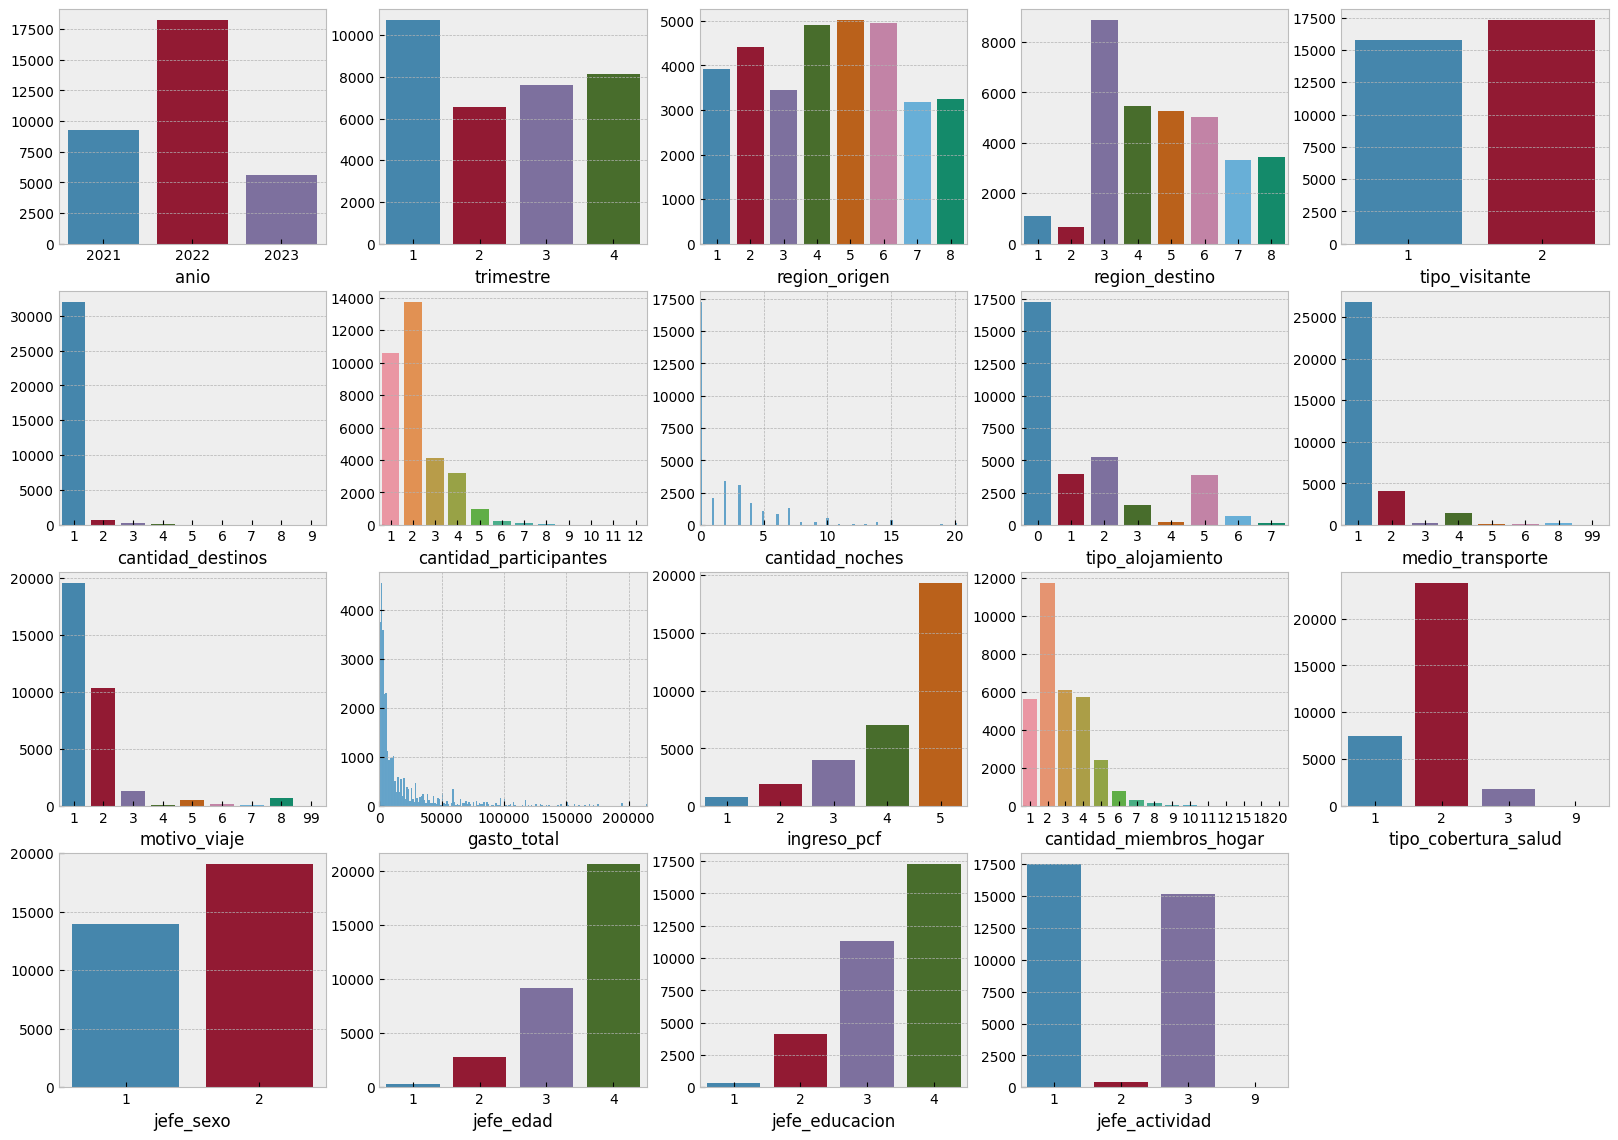

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(20, 14))

# Generación de distribuciones
for i, ax in enumerate(fig.axes):
  if i < len(df_turismo.columns):
    if df_turismo[df_turismo.columns[i]].nunique() <= 25:
      sns.countplot(data=df_turismo, x=df_turismo.columns[i], ax=ax)
    else:
      sns.histplot(data=df_turismo, x=df_turismo.columns[i], ax=ax)
      ax.set(xlim=(0, df_turismo[df_turismo.columns[i]].quantile(0.99)))
    ax.set(ylabel="", xlabel=df_turismo.columns[i])
  else:
    ax.remove()

¿Qué podemos resaltar de las distribuciones?

* Como tratamos los datos del 2do trimestre de 2021 hasta el 1ro de 2023, es entendible que gran parte de los datos provengan del 2022. Sin embargo, se intentó mantener un balanceo de las muestras por trimestre.
* Las regiones de origen son relativamente uniformes.
* La región de destino favorita es Buenos Aires (excluídos CABA y GBA)
* Tenemos datos balanceados respecto al tipo de visitante
  0. Turista: Visitante que pasa al menos una noche en el destino
  1. Excursionista: Visitante que no pasa ninguna noche
* La mayoría de las personas realizan viajes con un solo destino.
* Las personas prefieren visitar el país acompañados con un solo familiar que ir solos.
* En cuanto a los turistas, las noches de estadía tienden a ser entre 2 y 3 noches.
* El principal alojamiento que prefieren los visitantes es una segunda vivienda del grupo familiar (ya sea propia o alquilada).
* El principal medio de transporte es el automóvila propio, y en los motivos de viaje principales están por esparcimiento y por visitas a familiares o amigos.
* Teniendo en cuenta la moda, podemos decir que, con respecto a los hogares:
  * El ingreso per cápita familiar es del 5to quintil.
  * Tienen 2 miembros.
  * Están cubiertos por una obra social.
* Y con respecto al jefe/jefa de hogar:
  * Es varón
  * Tiene 60 años o más
  * Tiene educación superior completa
  * Está ocupado o inactivo

Podemos observar una tendencia clara con respecto al último ítem, nuestra muestra contiene muchos adultos mayores que están trabajando o ya se han jubilado. ¿Será porque este grupo está más predispuesto a completar estas encuestas? ¿O será porque entre los turistas internos este grupo resalta respecto a los otros? ¿Podría ser también que las personas de otros rangos etarios prefieren viajar al exterior en vez del interior del país?

## Destino preferido por trimestre

Diccionario de valores:

|ID|Región destino|
|---|---|
|1|CABA|
|2|GBA|
|3|Resto de Buenos Aires|
|4|Centro|
|5|Litoral|
|6|Norte|
|7|Cuyo|
|8|Patagonia|

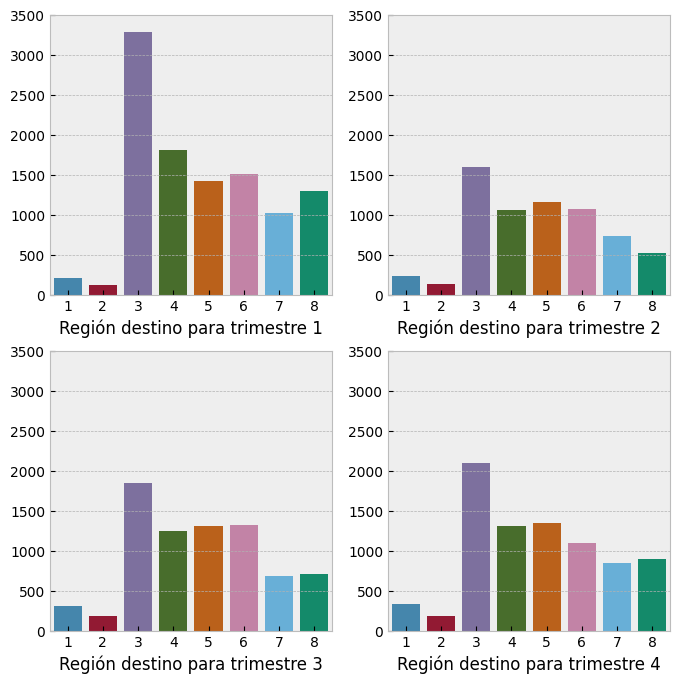

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for i, ax in enumerate(fig.axes):
  sns.countplot(data=df_turismo[df_turismo["trimestre"]==i+1], x="region_destino", ax=ax)
  ax.set(xlabel=f"Región destino para trimestre {i+1}", ylabel="", ylim=[0, 3500])

Podemos observar que el destino preferido de los visitantes es siempre la provincia de Buenos Aires (sin contar GBA y CABA). Sin embargo, en el primer trimestre, la cantidad relativa de este destino con respecto al resto es mucho mayor. ¿Podrá ser porque la muestra es mucho mayor en el 1er trimestre? ¿O será porque el 1er trimestre corresponde al verano, y la gente decide visitar las playas de Buenos Aires por sobre otros lugares?

Por otro lado, observamos que los destinos siguientes más elegidos son el Centro del país, el Litorial, y el Norte.

Con respecto a la primera pregunta, resulta conveniente analizar la cantidad de muestras por trimestre y año, para tratar de discernir porque hay tanta diferencia en el 1er trimestre con respecto al resto.

[Text(0.5, 0, 'Año'), Text(0, 0.5, '')]

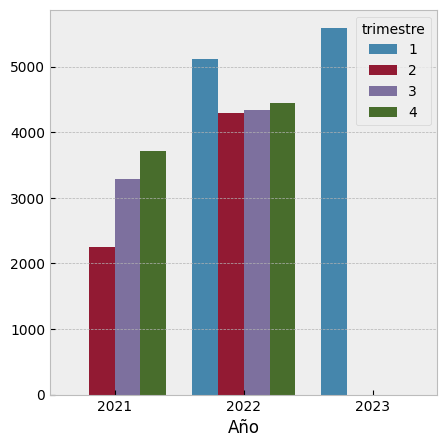

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(data=df_turismo, x="anio", hue="trimestre", ax=ax)
ax.set(xlabel="Año", ylabel="");

Como se observa, a medida que aumenta el año, también aumentó la cantidad de muestras, por lo que existe un desbalanceo a lo largo del tiempo.
Sin embargo, si revisamos por trimestre, por ejemplo en 2022, podemos ver que las muestras tienen su fondo en el 2do trimestre, y van aumentando hasta el 1er trimestre, posiblemente por el hecho de que se realizan más vacaciones o visitas en verano.

## ¿Cómo viajan los/las jefes/jefas de hogar según el sexo?

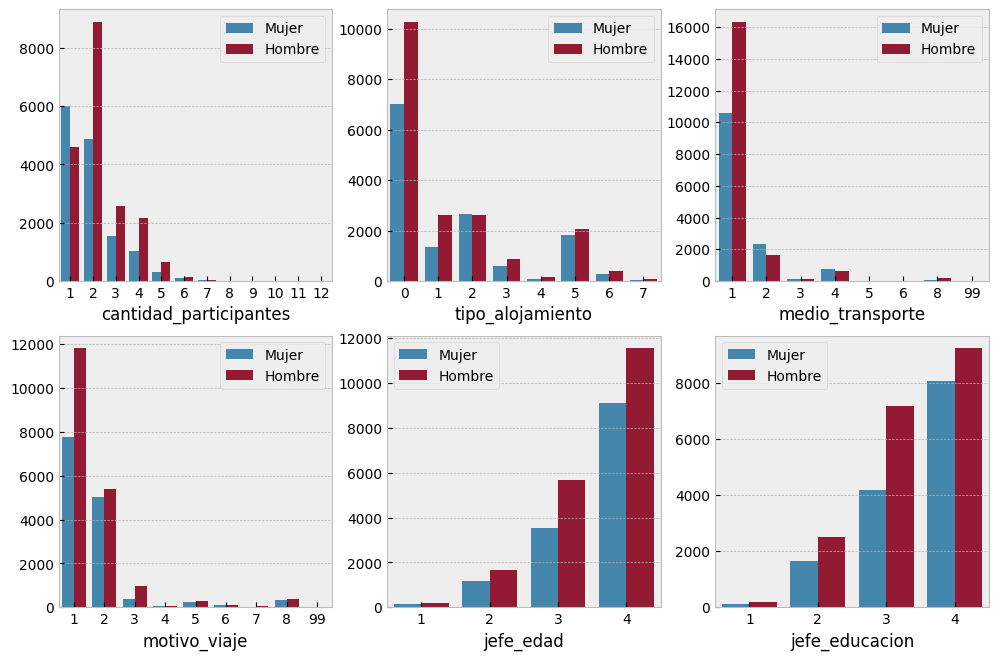

In [32]:
columnas = ["cantidad_participantes", "tipo_alojamiento", "medio_transporte", "motivo_viaje", "jefe_edad", "jefe_educacion"]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Generación de distribuciones
for i, ax in enumerate(fig.axes):
  if i < len(columnas):
    sns.countplot(data=df_turismo, x=columnas[i], hue="jefe_sexo", ax=ax)
    ax.set(ylabel="", xlabel=columnas[i])
    ax.legend(labels=["Mujer", "Hombre"])
  else:
    ax.remove()

Se observa que las tendencias tienden a ser similares en ambos sexos:
* Prefieren alojarse en una vivienda del grupo familiar (alquilada o propia)
* Prefieren viajar en auto y por motivos de recreación o visita a familiares.
* Son principalmente personas adultas mayores y tienen educación secundaria completa o superior.

Un aspecto sutil que se puede tener en cuenta, es que los hombres tienden a viajar con un acompañante, mientras que las mujeres prefieren viajar solas, aunque no es mucha la diferencia respecto a los que viajan acompañados.